In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()


In [ ]:
X_train.shape


(50000, 32, 32, 3)

In [ ]:
y_train.shape


(50000, 1)

In [ ]:
y_train = y_train.reshape(-1,)


In [ ]:
X_test.shape


(10000, 32, 32, 3)

In [ ]:
y_test.shape


(10000, 1)

In [ ]:
classes = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]


In [ ]:
def plot_sample(index, X=X_train,y=y_train):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


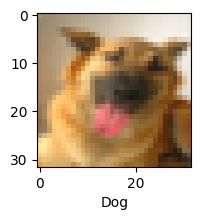

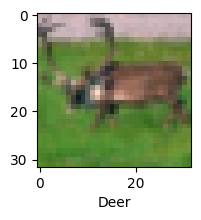

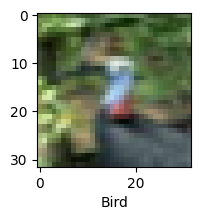

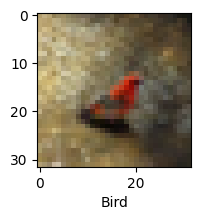

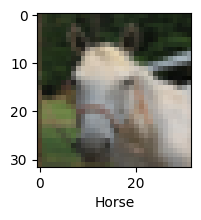

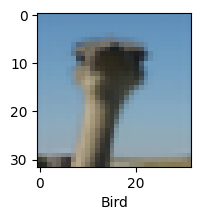

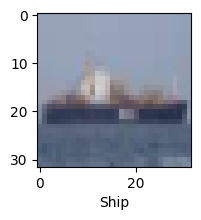

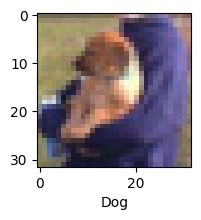

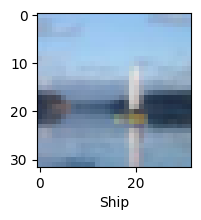

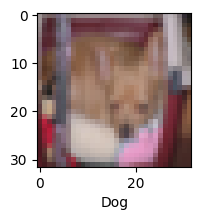

In [ ]:
import random

# Choose 10 random indices
random_indices = random.sample(range(len(X_train)), 10)

# Plot the random samples
for i in random_indices:
    plot_sample(i)

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()


In [ ]:
# number of classes
K = len(set(y_train))

# Calculate the number of classes for output layer
print("The number of classes:", K)

The number of classes: 10


In [ ]:
i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3,3), activation = 'relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation = 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation = 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation = 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation = 'relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)


In [ ]:
x = Dense(1024, activation= 'relu')(x)
x = Dropout(0.2)(x)


In [ ]:
x = Dense(K, activation='softmax')(x)


In [ ]:
model = Model(i, x)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,397,226 (9.14 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 442s 279ms/step - accuracy: 0.4450 - loss: 1.7308 - val_accuracy: 0.6360 - val_loss: 1.0445
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 426s 270ms/step - accuracy: 0.6954 - loss: 0.8768 - val_accuracy: 0.7270 - val_loss: 0.7916
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 414s 265ms/step - accuracy: 0.7607 - loss: 0.6841 - val_accuracy: 0.6546 - val_loss: 0.9979
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 442s 265ms/step - accuracy: 0.7997 - loss: 0.5787 - val_accuracy: 0.7774 - val_loss: 0.6614
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 418s 267ms/step - accuracy: 0.8361 - loss: 0.4759 - val_accuracy: 0.7993 - val_loss: 0.6174
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 415s 266ms/step - accuracy: 0.8584 - loss: 0.4041 - val_accuracy: 0.8041 - val_loss: 0.6089
Epoch 7/10


In [22]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip = True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data = (X_test, y_test),
              steps_per_epoch = steps_per_epoch, epochs = 10)


Epoch 1/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 453s 290ms/step - accuracy: 0.8569 - loss: 0.4155 - val_accuracy: 0.8426 - val_loss: 0.4707
Epoch 2/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8438 - loss: 0.4180 - val_accuracy: 0.8416 - val_loss: 0.4725
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 430s 275ms/step - accuracy: 0.8649 - loss: 0.3982 - val_accuracy: 0.8466 - val_loss: 0.4646
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.8438 - loss: 0.4805 - val_accuracy: 0.8466 - val_loss: 0.4646
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 490s 280ms/step - accuracy: 0.8709 - loss: 0.3789 - val_accuracy: 0.8570 - val_loss: 0.4356
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8750 - loss: 0.2672 - val_accuracy: 0.8574 - val_loss: 0.4331
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 483s 281ms/step - accuracy: 0.8757 - loss: 0.3660 - val_accuracy: 0.8583 - val_loss: 0.4366
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 

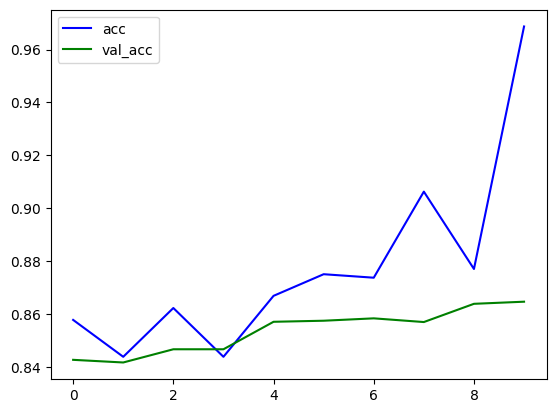

In [23]:
plt.plot(r.history['accuracy'], label = 'acc', color = 'blue')
plt.plot(r.history['val_accuracy'], label= 'val_acc', color = 'green')
plt.legend();


In [26]:
from sklearn.metrics import confusion_matrix , classification_report
classes = ["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes, target_names=classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step
Classification Report: 
               precision    recall  f1-score   support

    Airplane       0.89      0.87      0.88      1000
  Automobile       0.96      0.93      0.94      1000
        Bird       0.87      0.79      0.83      1000
         Cat       0.72      0.74      0.73      1000
        Deer       0.83      0.86      0.84      1000
         Dog       0.83      0.75      0.79      1000
        Frog       0.83      0.94      0.88      1000
       Horse       0.91      0.91      0.91      1000
        Ship       0.93      0.92      0.92      1000
       Truck       0.89      0.95      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



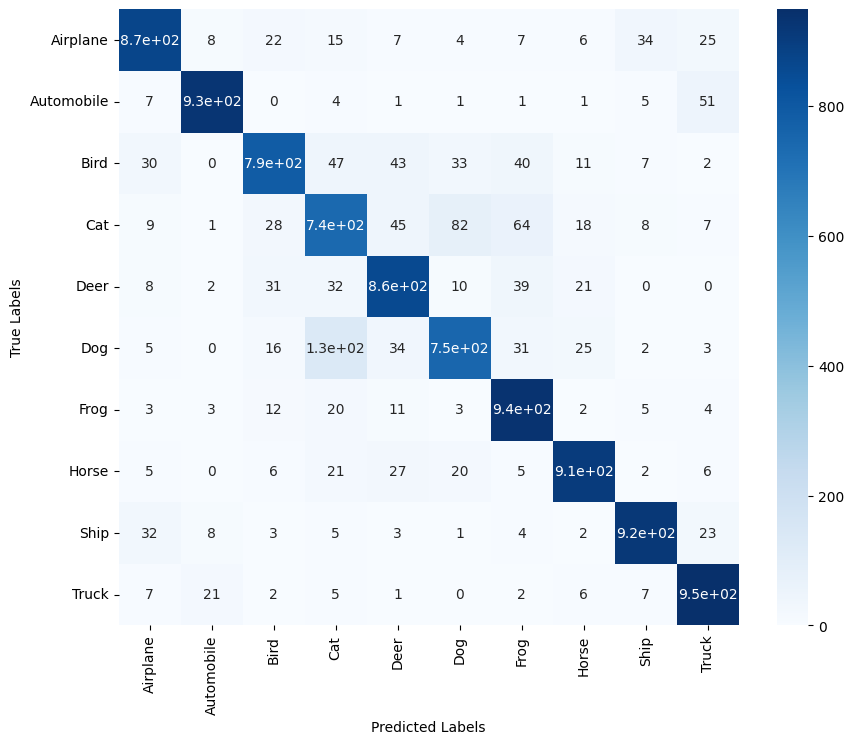

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_classes)

# Set the class labels for the heatmap
class_labels = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()